# Wind energy prospection: 
## Pipelines for wind power analysis from IDEAM database.

### 1. Load libraries and datasets:

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
import missingno as msno
import os
import zipfile
from glob import glob
from scipy.special import gamma
from utils import wind

In [2]:
# Searching for datasets in the directory
datasets_dir = "./raw_data/" # Already done
search_pattern = "*.zip"
zip_files = glob(os.path.join(datasets_dir, search_pattern))
print(zip_files)

['./raw_data/data_2.zip', './raw_data/data_1.zip', './raw_data/data_3.zip']


In [3]:
# Unzip datasets
# try: # Already done
#     for key in zip_files:
#         directory = os.path.join("processed_data",os.path.basename(key)[:-4])
#         with zipfile.ZipFile(key, "r") as zf:
#             zf.extractall(directory)
# except FileExistsError:
#     pass

#### 1.2 Loading Datasets:

In [4]:
guajira = pd.read_csv("./processed_data/data_1/excel.csv.csv", header=0)
guajira_2 = pd.read_csv("./processed_data/data_2/excel.csv.csv", header=0)
meta = pd.read_csv("./processed_data/data_3/excel.csv.csv", header=0)

/tmp/ipykernel_93964/2553279605.py:3: DtypeWarning: Columns (11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv("./processed_data/data_3/excel.csv.csv", header=0)


## 2. Explore Data

In [5]:
meta.head()

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,35035020,AEROPUERTO VANGUARDIA [35035020],4.161919,-73.617578,422,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 03 - Meta-Guaviare-Guainía,Meta,Villavicencio,...,NaN,VEL VIENTO,VVAG_CON,Velocidad del viento de las 24 horas,Horaria,1977-04-01 04:00,0.0,50,NaN,900
1,35035020,AEROPUERTO VANGUARDIA [35035020],4.161919,-73.617578,422,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 03 - Meta-Guaviare-Guainía,Meta,Villavicencio,...,NaN,VEL VIENTO,VVAG_CON,Velocidad del viento de las 24 horas,Horaria,1977-04-01 05:00,0.0,50,NaN,900
2,35035020,AEROPUERTO VANGUARDIA [35035020],4.161919,-73.617578,422,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 03 - Meta-Guaviare-Guainía,Meta,Villavicencio,...,NaN,VEL VIENTO,VVAG_CON,Velocidad del viento de las 24 horas,Horaria,1977-04-01 06:00,0.5,50,NaN,900
3,35035020,AEROPUERTO VANGUARDIA [35035020],4.161919,-73.617578,422,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 03 - Meta-Guaviare-Guainía,Meta,Villavicencio,...,NaN,VEL VIENTO,VVAG_CON,Velocidad del viento de las 24 horas,Horaria,1977-04-01 07:00,0.0,50,NaN,900
4,35035020,AEROPUERTO VANGUARDIA [35035020],4.161919,-73.617578,422,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 03 - Meta-Guaviare-Guainía,Meta,Villavicencio,...,NaN,VEL VIENTO,VVAG_CON,Velocidad del viento de las 24 horas,Horaria,1977-04-01 08:00,0.0,50,NaN,900


In [6]:
meta.columns

Index(['CodigoEstacion', 'NombreEstacion', 'Latitud', 'Longitud', 'Altitud',
       'Categoria', 'Entidad', 'AreaOperativa', 'Departamento', 'Municipio',
       'FechaInstalacion', 'FechaSuspension', 'IdParametro', 'Etiqueta',
       'DescripcionSerie', 'Frecuencia', 'Fecha', 'Valor', 'Grado',
       'Calificador', 'NivelAprobacion'],
      dtype='object')

In [7]:
meta.dtypes

CodigoEstacion        int64
NombreEstacion       object
Latitud             float64
Longitud            float64
Altitud               int64
Categoria            object
Entidad              object
AreaOperativa        object
Departamento         object
Municipio            object
FechaInstalacion     object
FechaSuspension      object
IdParametro          object
Etiqueta             object
DescripcionSerie     object
Frecuencia           object
Fecha                object
Valor               float64
Grado                 int64
Calificador          object
NivelAprobacion       int64
dtype: object

In [8]:
meta = meta.wclean.time_convert()

In [9]:
meta = meta.wclean.hellman_column(height_zone=80, alpha_zone=0.1)
meta.tail()

,NombreEstacion,Categoria,Municipio,DescripcionSerie,Frecuencia,Valor,Fecha,Mes,Hora,Valor80
284378,AEROPUERTO VANGUARDIA [35035020],Sinóptica Principal,Villavicencio,Velocidad del viento de las 24 horas,Horaria,1.071,2018-10-18 07:00:00,10,7,1.318556
284379,AEROPUERTO VANGUARDIA [35035020],Sinóptica Principal,Villavicencio,Velocidad del viento de las 24 horas,Horaria,0.510,2018-10-18 08:00:00,10,8,0.627884
284380,AEROPUERTO VANGUARDIA [35035020],Sinóptica Principal,Villavicencio,Velocidad del viento de las 24 horas,Horaria,1.581,2018-10-18 09:00:00,10,9,1.946439
284381,AEROPUERTO VANGUARDIA [35035020],Sinóptica Principal,Villavicencio,Velocidad del viento de las 24 horas,Horaria,1.581,2018-10-18 10:00:00,10,10,1.946439
284382,AEROPUERTO VANGUARDIA [35035020],Sinóptica Principal,Villavicencio,Velocidad del viento de las 24 horas,Horaria,1.581,2018-10-18 11:00:00,10,11,1.946439


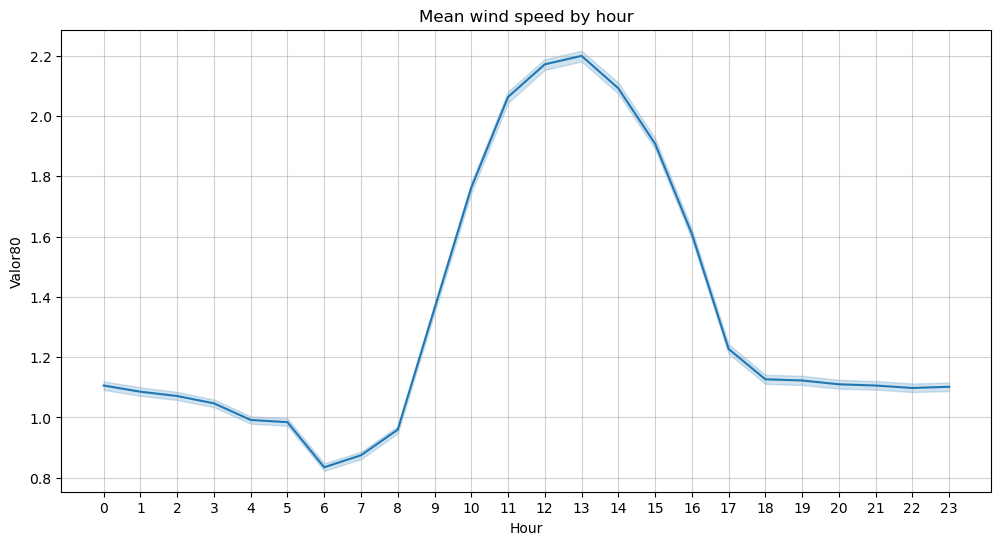

In [10]:
meta.wclean.hourly_wind_plot("Valor80")

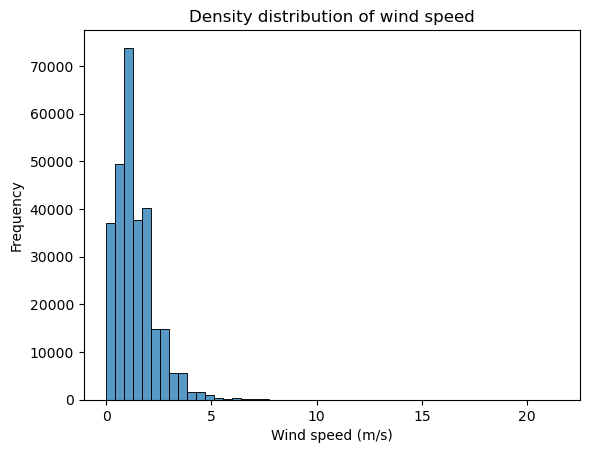

In [17]:
meta.wclean.normal_wind_density_dist("Valor80", bins=50)

In [12]:
guajira = guajira.wclean.time_convert(year=True)

In [13]:
guajira.wclean.hellman_column(height_zone=90, alpha_zone=0.2)

,NombreEstacion,Categoria,Municipio,DescripcionSerie,Frecuencia,Valor,Fecha,Mes,Hora,Year,Valor90
0,AEROPUERTO ALM. PADILLA - [15065180],Sinóptica Principal,Riohacha,Velocidad del viento de las 24 horas,Horaria,4.9,2020-01-01 14:00:00,1,14,2020,7.604043
1,AEROPUERTO ALM. PADILLA - [15065180],Sinóptica Principal,Riohacha,Velocidad del viento de las 24 horas,Horaria,4.3,2020-01-01 15:00:00,1,15,2020,6.672936
2,AEROPUERTO ALM. PADILLA - [15065180],Sinóptica Principal,Riohacha,Velocidad del viento de las 24 horas,Horaria,3.2,2020-01-01 16:00:00,1,16,2020,4.965906
3,AEROPUERTO ALM. PADILLA - [15065180],Sinóptica Principal,Riohacha,Velocidad del viento de las 24 horas,Horaria,3.2,2020-01-01 17:00:00,1,17,2020,4.965906
4,AEROPUERTO ALM. PADILLA - [15065180],Sinóptica Principal,Riohacha,Velocidad del viento de las 24 horas,Horaria,2.1,2020-01-01 18:00:00,1,18,2020,3.258876
...,...,...,...,...,...,...,...,...,...,...,...
2882,AEROPUERTO ALM. PADILLA - [15065180],Sinóptica Principal,Riohacha,Velocidad del viento de las 24 horas,Horaria,2.6,2020-05-01 02:00:00,5,2,2020,4.034798
2883,AEROPUERTO ALM. PADILLA - [15065180],Sinóptica Principal,Riohacha,Velocidad del viento de las 24 horas,Horaria,2.9,2020-05-01 03:00:00,5,3,2020,4.500352
2884,AEROPUERTO ALM. PADILLA - [15065180],Sinóptica Principal,Riohacha,Velocidad del viento de las 24 horas,Horaria,3.9,2020-05-01 04:00:00,5,4,2020,6.052198
2885,AEROPUERTO ALM. PADILLA - [15065180],Sinóptica Principal,Riohacha,Velocidad del viento de las 24 horas,Horaria,3.6,2020-05-01 05:00:00,5,5,2020,5.586644


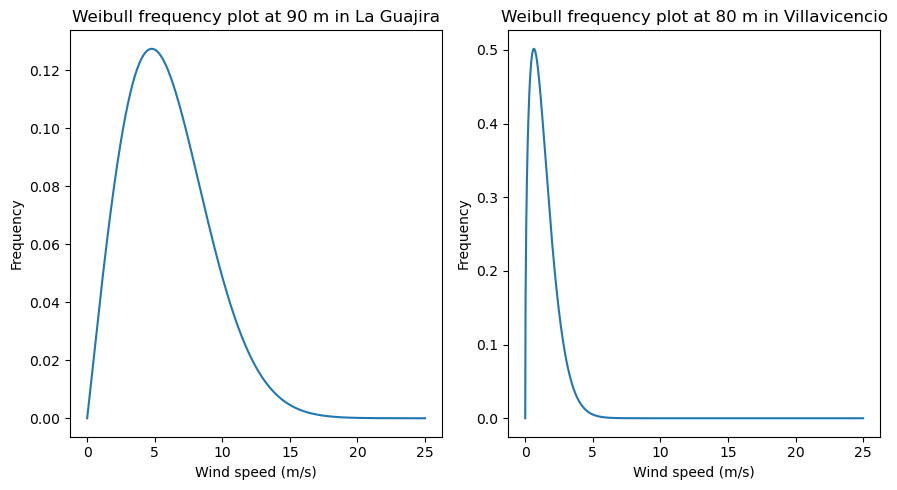

In [14]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
guajira.wclean.weibull_plot("Valor90", title="Weibull frequency plot at 90 m in La Guajira", ax=axis[0])
meta.wclean.weibull_plot("Valor80", title="Weibull frequency plot at 80 m in Villavicencio", ax=axis[1])
plt.tight_layout()
plt.show()